### Load relevant libraries

In [1]:
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
from os import path, getcwd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

C:\Users\Bryce\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### identify links on webpage

In [2]:
def get_soup(html):
    resp = requests.get(html)
    http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, from_encoding=encoding)
    return soup

### create list with links from webpage

In [3]:
def get_links(soup):
    http_link_list = [] 
    for link in soup.find_all('a', href=True):
        if link['href'][0] != '/': 
            http_link_list.append(link['href'].strip("'"))
    return http_link_list 

### pull b and td tags from webpage

In [4]:
def get_ps(soup):
    http_link_list = [] 
    for link in soup.find_all('b'):
        http_link_list.append(link.get_text())
    return http_link_list 

In [5]:
def get_ps_td(soup):
    http_link_list = [] 
    for link in soup.find_all('td'):
        http_link_list.append(link.get_text())
    return http_link_list 

### get text from an array

In [7]:
def get_text(text_array):
    text = " ".join(text_array)
    return text

### get text from all interviews in list

In [8]:
def get_interview_text(interview_list):
    text_return = []
    for i in interview_list:
        print(i)
        soup = get_soup(i)
        interview = get_ps_td(soup)[13]
        c = interview.find('Q.')
        d = interview.find('FastScripts')  
        text_array = interview[c+2:d]
        text_return.append(text_array)
    return text_return

### remove punctuation and stop words

In [9]:
def punctuation_stop(text):    
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

### webpage

In [10]:
lj_transcripts = 'http://www.asapsports.com/show_player.php?id=13888'

### get word soup from webpage

In [11]:
soupout = get_soup(lj_transcripts)
soupout

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>ASAP Sports Transcripts - Basketball - Player: LeBron James</title>
<meta content="slbHbc0lYYv6O/pD/jlxKm5goi5FliNVMyoNlrlLIgU=" name="verify-v1"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="asapsports, sports interviews, sports transcripts, sports interview, sports transcript, us open golf, us open tennis, wimbledon, masters golf, PGA, LPGA, NBA, NFL, WNBA, MLB, Nascar, indy racing, all star game, NCAA, cart racing, world series, super bowl, NHL, tennis, golf, USTA" name="keywords"/>
<meta content="ASAPSports FastScripts, a system using state-of-the-art technology created to produce verbatim FastScripts of press conferences and player/team interviews at sporting events around the globe." name="description"/>
<link href="styles.css" rel="stylesheet" type="text/css"/>
<script src="functions.js" type="text/javascript"></scrip

### get links from webpage

In [12]:
all_links = get_links(soupout)
all_links

['http://www.asapsports.com',
 'jobs_new.php',
 'contact.php',
 'http://www.asapsports.com',
 'captioning.php',
 'recent.php',
 'show_event.php',
 'about.php',
 'http://www.facebook.com/pages/ASAP-Sports/122368829031',
 'http://twitter.com/asapsports',
 'rss12.php',
 'rss12.php',
 'http://www.asaptext.com',
 'http://www.asaptext.com',
 '#',
 'http://www.asapsports.com/show_interview.php?id=183866',
 'http://www.asapsports.com/show_interview.php?id=183867',
 'http://www.asapsports.com/show_interview.php?id=183871',
 'http://www.asapsports.com/show_interview.php?id=173184',
 'http://www.asapsports.com/show_interview.php?id=173143',
 'http://www.asapsports.com/show_interview.php?id=162944',
 'http://www.asapsports.com/show_interview.php?id=160601',
 'http://www.asapsports.com/show_interview.php?id=160301',
 'http://www.asapsports.com/show_interview.php?id=160224',
 'http://www.asapsports.com/show_interview.php?id=160174',
 'http://www.asapsports.com/show_interview.php?id=160149',
 'http:/

### trim links to only interviews

In [13]:
interview_links = all_links[15:-14]
interview_links

['http://www.asapsports.com/show_interview.php?id=183866',
 'http://www.asapsports.com/show_interview.php?id=183867',
 'http://www.asapsports.com/show_interview.php?id=183871',
 'http://www.asapsports.com/show_interview.php?id=173184',
 'http://www.asapsports.com/show_interview.php?id=173143',
 'http://www.asapsports.com/show_interview.php?id=162944',
 'http://www.asapsports.com/show_interview.php?id=160601',
 'http://www.asapsports.com/show_interview.php?id=160301',
 'http://www.asapsports.com/show_interview.php?id=160224',
 'http://www.asapsports.com/show_interview.php?id=160174',
 'http://www.asapsports.com/show_interview.php?id=160149',
 'http://www.asapsports.com/show_interview.php?id=160135',
 'http://www.asapsports.com/show_interview.php?id=160070',
 'http://www.asapsports.com/show_interview.php?id=160005',
 'http://www.asapsports.com/show_interview.php?id=159983',
 'http://www.asapsports.com/show_interview.php?id=159954',
 'http://www.asapsports.com/show_interview.php?id=159921

### display title of transcript associated with links

In [14]:
raw_titles = get_ps(soupout)
titles = raw_titles[1::2]
titles

['NBA ALL-STAR GAME 2023',
 'ALL-STAR GAME: TEAM GIANNIS VS. TEAM LEBRON',
 'ALL-STAR GAME: TEAM GIANNIS VS. TEAM LEBRON',
 'ALL-STAR GAME: TEAM DURANT VS. TEAM LEBRON',
 'NBA ALL-STAR MEDIA DAY',
 'NBA ALL STAR',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA FINALS: LAKERS VS. HEAT',
 'NBA WESTERN CONFERENCE FINALS: LAKERS VS. NUGGETS',
 'NBA WESTERN CONFERENCE FINALS: LAKERS VS. NUGGETS',
 'NBA WESTERN CONFERENCE FINALS: LAKERS VS. NUGGETS',
 'NBA WESTERN CONFERENCE FINALS: LAKERS VS. NUGGETS',
 'NBA WESTERN CONFERENCE FINALS: LAKERS VS. NUGGETS',
 'NBA WESTERN CONFERENCE FINALS: LAKERS VS. NUGGETS',
 'NBA ALL-STAR 2020',
 'NBA ALL-STAR 2020',
 'NBA ALL-STAR WEEKEND 2019',
 'NBA ALL-STAR 2019',
 'NBA FINALS: CAVALIERS vs WARRIORS',
 'NBA FI

### identify ASG link index

In [15]:
asg_check_list = []
for i in titles:
    asg_check = i.find("ALL-STAR")  
    asg_check_list.append(asg_check)

In [16]:
asg_index = []
i = 0
while i < len(asg_check_list):
    if asg_check_list[i] != -1:
        asg_index.append(i)
        i+=1
    else:
        i+=1

In [17]:
asg_index

[0,
 1,
 2,
 3,
 4,
 22,
 23,
 24,
 25,
 41,
 42,
 59,
 83,
 84,
 85,
 105,
 106,
 129,
 130,
 153,
 173,
 174,
 196,
 197,
 201,
 210,
 211,
 212,
 213,
 231,
 232,
 233,
 234,
 235]

###### after checking website with our indexes, realized one transcript was titled 'ALL STAR' instead of 'ALL-STAR'. As this is just one instance we will simply append the index, however we could have executed another .find() search if the issue occurred more frequently.

In [18]:
asg_index.append(5)

In [19]:
asg_index.sort()
asg_index

[0,
 1,
 2,
 3,
 4,
 5,
 22,
 23,
 24,
 25,
 41,
 42,
 59,
 83,
 84,
 85,
 105,
 106,
 129,
 130,
 153,
 173,
 174,
 196,
 197,
 201,
 210,
 211,
 212,
 213,
 231,
 232,
 233,
 234,
 235]

### ASG links

In [20]:
asg_links = []
i = 0
while i < len(asg_index):
    a_i = int(asg_index[i])
    asg_links.append(interview_links[a_i])
    i += 1

In [21]:
asg_links

['http://www.asapsports.com/show_interview.php?id=183866',
 'http://www.asapsports.com/show_interview.php?id=183867',
 'http://www.asapsports.com/show_interview.php?id=183871',
 'http://www.asapsports.com/show_interview.php?id=173184',
 'http://www.asapsports.com/show_interview.php?id=173143',
 'http://www.asapsports.com/show_interview.php?id=162944',
 'http://www.asapsports.com/show_interview.php?id=157181',
 'http://www.asapsports.com/show_interview.php?id=157145',
 'http://www.asapsports.com/show_interview.php?id=147131',
 'http://www.asapsports.com/show_interview.php?id=147096',
 'http://www.asapsports.com/show_interview.php?id=137423',
 'http://www.asapsports.com/show_interview.php?id=137375',
 'http://www.asapsports.com/show_interview.php?id=127156',
 'http://www.asapsports.com/show_interview.php?id=116704',
 'http://www.asapsports.com/show_interview.php?id=116663',
 'http://www.asapsports.com/show_interview.php?id=116643',
 'http://www.asapsports.com/show_interview.php?id=106385

### return list of all interview text

In [22]:
text_return_list = get_interview_text(asg_links)
all_text = get_text(text_return_list)
all_text

http://www.asapsports.com/show_interview.php?id=183866
http://www.asapsports.com/show_interview.php?id=183867
http://www.asapsports.com/show_interview.php?id=183871
http://www.asapsports.com/show_interview.php?id=173184
http://www.asapsports.com/show_interview.php?id=173143
http://www.asapsports.com/show_interview.php?id=162944
http://www.asapsports.com/show_interview.php?id=157181
http://www.asapsports.com/show_interview.php?id=157145
http://www.asapsports.com/show_interview.php?id=147131
http://www.asapsports.com/show_interview.php?id=147096
http://www.asapsports.com/show_interview.php?id=137423
http://www.asapsports.com/show_interview.php?id=137375
http://www.asapsports.com/show_interview.php?id=127156
http://www.asapsports.com/show_interview.php?id=116704
http://www.asapsports.com/show_interview.php?id=116663
http://www.asapsports.com/show_interview.php?id=116643
http://www.asapsports.com/show_interview.php?id=106385
http://www.asapsports.com/show_interview.php?id=106285
http://www

' LeBron, how do you view the 23 games remaining in the Lakers\' season in terms of the challenges that you\'ve had in your career?  Obviously, the goal everyone is stating is to make the postseason.\nLEBRON JAMES:   It\'s 23 of the most important games of my career for a regular season.  It\'s the type of mindset that I have and I hope the guys will have coming back off the break.\nQ. Physically, how are you feeling for that 23-game stretch knowing that obviously things can change?  You\'ve been battling this foot thing.  How has this time off helped, and how did you come out of Thursday\'s game?\nLEBRON JAMES:   This couple of days has helped, not having to stress it being out on the floor.  So it\'s helped.  I\'m going to try not to go too crazy in the game.  I\'m going to have some fun, but not go too crazy.\nThe most important thing for me right now is to maintain my health and be available to my teammates after this break because we have to make a strong push if we want to do any

### remove punctuation and stop words

In [23]:
filteredtext = punctuation_stop(all_text)

### list of unwanted words

In [24]:
unwanted = ['q', 'game', 'see', 'captioning', 'upcoming', 'events', 'site', 'asap', 'sports', 'transcript', 'contact', 'us', 'products', 'subscribe', 'find', 'lebron', 'james', 'maybe', 'kind', 'coming', 'people', 'think', 'know', 'obviously', 'mean', 'lot', 'a', 'really','mean','little bit','thing','say','go','actually','even','probably','going','said','something','okay','maybe','got']

### remove unwanted words

In [25]:
text = " ".join([ele for ele in filteredtext if ele not in unwanted])

### working dictionary

In [26]:
d = getcwd()

### image file for mask

In [27]:
mask = np.array(Image.open("bballo.png").convert("RGBA"))

### check image format

In [28]:
mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

### word cloud object

In [29]:
wc = WordCloud(background_color="white", max_words=300, random_state=1, stopwords=STOPWORDS, mask=mask)

In [30]:
wc.generate(text)

In [31]:
image_colors = ImageColorGenerator(mask)

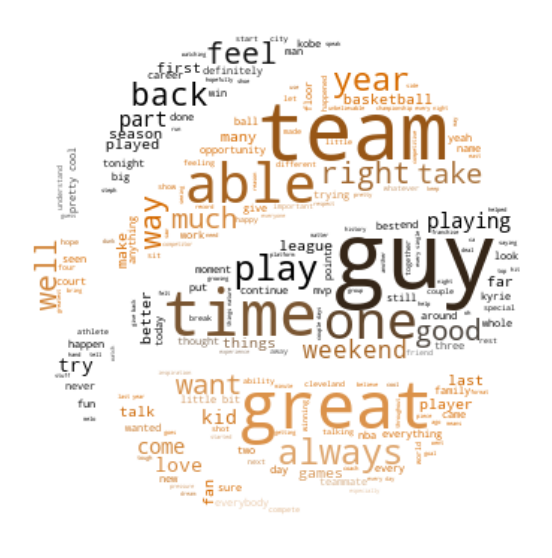

In [32]:
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()